## Clase 03/23/2025
## Representación númerica
Como un computadora almacena y maneja número utilizando bits (0 y 1)

In [ ]:

def binary_enteros(numero):
    parte_entera = ""
    numero =int(numero)

    if numero == 0:
        return "0"
    
    while numero > 0:
        residuo = numero % 2
        parte_entera = str(residuo) + parte_entera
        numero = numero // 2
    return parte_entera

def binary_decimal(numero):
    parte_decimal = ""
    numero =  numero - int(numero)

    contador = 0

    while numero > 0 and contador < 60:
        numero *=2
        bit = int(numero)
        parte_decimal = parte_decimal + str(bit)
        numero -= bit
        if abs(numero) <1e-10:
            break
        contador += 1
    return parte_decimal

def transformacion_32(numero):
    signo = 0 if numero >= 0 else 1
    numero = abs(numero)

    parte_entera_bin = binary_enteros(numero)
    parte_decimal_bin = binary_decimal(numero)

    if parte_entera_bin =="0":

        normalizado =parte_decimal_bin.lstrip("0")
        exponente = -len(parte_decimal_bin) + len(normalizado)
    else:
       
        normalizado = parte_entera_bin + parte_decimal_bin
        exponente = len(parte_entera_bin)- 1

   
    sesgo = 127
    exponente_bin = binary_enteros(exponente + sesgo)

    
    mantisa = normalizado[1:24] if len(normalizado)> 1 else "0" * 23
    mantisa = mantisa.ljust(23, "0")

    return f"{signo} {exponente_bin.zfill(8)} {mantisa}"


def transformacion_64(numero):
    signo = 0 if numero >= 0 else 1
    numero = abs(numero)

    parte_entera_bin = binary_enteros(numero)
    parte_decimal_bin = binary_decimal(numero)

    if parte_entera_bin == "0":
    
        normalizado = parte_decimal_bin.lstrip("0")
        exponente = -len(parte_decimal_bin) + len(normalizado)
    else:
       
        normalizado = parte_entera_bin + parte_decimal_bin
        exponente = len(parte_entera_bin)- 1

  
    sesgo = 1023
    exponente_bin = binary_enteros(exponente + sesgo)

    mantisa = normalizado[1:53] if len(normalizado) > 1 else "0" * 52
    mantisa = mantisa.ljust(52, "0")

    return f"{signo} {exponente_bin.zfill(11)} {mantisa}"

print("Transformación IEEE 754")
num_console = float(input("Ingrese un número: "))

        
transformacion_32 = transformacion_32(num_console)
transformacion_64= transformacion_64(num_console)

print(f"Representación IEEE 754 de 32 bits: {transformacion_32}")
print(f"Representación IEEE 754 de 64 bits: {transformacion_64}")





Transformación IEEE 754 DE 32 bits
Representación IEEE 754 de 32 bits: 0 10000111 00000111010011001100110
Representación IEEE 754 de 64 bits: 0 10000000111 0000011101001100110011001100110011001100110011001101


## Aritmética de dígitos finitos de computador
$$
\pm 0.d_1d_2 \dots d_k \times 10^n
$$


### Operaciones
Abajo de cada operación estará un ejemplo, suponiendo que **X = 5/7** y **Y = 0.714251**, y usamos redondeo a 5 cifras significativas.

**1**. Suma
$$
 x \oplus y = f_l(f_l(x) + f_l(y)) 
$$



In [17]:
x = 0.71429
y = 0.71425
resultado = x + y

def represenacion_punto_flotante(numero):
    
    signo = "-" if numero < 0 else ""
    numero = abs(numero)

    exponente =0
    if numero != 0:
        while numero >=1:
            numero /= 10
            exponente += 1
        while numero < 0.1:
            numero *= 10
            exponente -= 1



    mantisa = f"{numero:.1f}".lstrip("0")
    return f"{signo}0{mantisa} * 10^{exponente}"

resultado_punto_flotante = represenacion_punto_flotante(resultado)

print(f"Suma: {resultado}")
print(f"Resultado en punto flotante: {resultado_punto_flotante}")

Suma: 1.42854
Resultado en punto flotante: 0.1 * 10^1


**2**. Resta
$$
 x \ominus y = f_l(f_l(x) - f_l(y)) 
$$


In [18]:
x = 0.71429
y = 0.71425
resultado = x - y

def represenacion_punto_flotante(numero):
    
    signo = "-" if numero < 0 else ""
    numero = abs(numero)

    exponente =0
    if numero != 0:
        while numero >=1:
            numero /= 10
            exponente += 1
        while numero < 0.1:
            numero *= 10
            exponente -= 1



    mantisa = f"{numero:.1f}".lstrip("0")
    return f"{signo}0{mantisa} * 10^{exponente}"

resultado_punto_flotante = represenacion_punto_flotante(resultado)

print(f"Resta: {resultado}")
print(f"Resultado en punto flotante: {resultado_punto_flotante}")

Resta: 3.999999999992898e-05
Resultado en punto flotante: 0.4 * 10^-4


**3**. Multiplicación
$$
x \otimes y = f_l(f_l(x) * f_l(y)) 
$$



In [ ]:
x = 0.71429
y = 0.71425
resultado = x * y

def represenacion_punto_flotante(numero):
    
    signo = "-" if numero < 0 else ""
    numero = abs(numero)

    exponente =0
    if numero != 0:
        while numero >=1:
            numero /= 10
            exponente += 1
        while numero < 0.1:
            numero *= 10
            exponente -= 1



    mantisa = f"{numero:.1f}".lstrip("0")
    return f"{signo}0{mantisa} * 10^{exponente}"

resultado_punto_flotante = represenacion_punto_flotante(resultado)

print(f"Multiplicación: {resultado}")
print(f"Resultado en punto flotante: {resultado_punto_flotante}")

Resta: 0.5101816325
Resultado en punto flotante: 0.5 * 10^0


**4** División
$$
x \oslash y = f_l\left(\frac{f_l(x)} {f_l(y)}\right)  

In [ ]:
x = 0.71429
y = 0.71425
resultado = x / y

def represenacion_punto_flotante(numero):
    
    signo = "-" if numero < 0 else ""
    numero = abs(numero)

    exponente =0
    if numero != 0:
        while numero >=1:
            numero /= 10
            exponente += 1
        while numero < 0.1:
            numero *= 10
            exponente -= 1



    mantisa = f"{numero:.1f}".lstrip("0")
    return f"{signo}0{mantisa} * 10^{exponente}"

resultado_punto_flotante = represenacion_punto_flotante(resultado)

print(f"División: {resultado}")
print(f"Resultado en punto flotante: {resultado_punto_flotante}")

Resta: 1.00005600280014
Resultado en punto flotante: 0.1 * 10^1


## Convergencia, Divergencia y Tolerancia
### Convergencia
Converge si, al aumentar el número de iteraciones, los resultados se acercan cada vez más a la solución exacta.

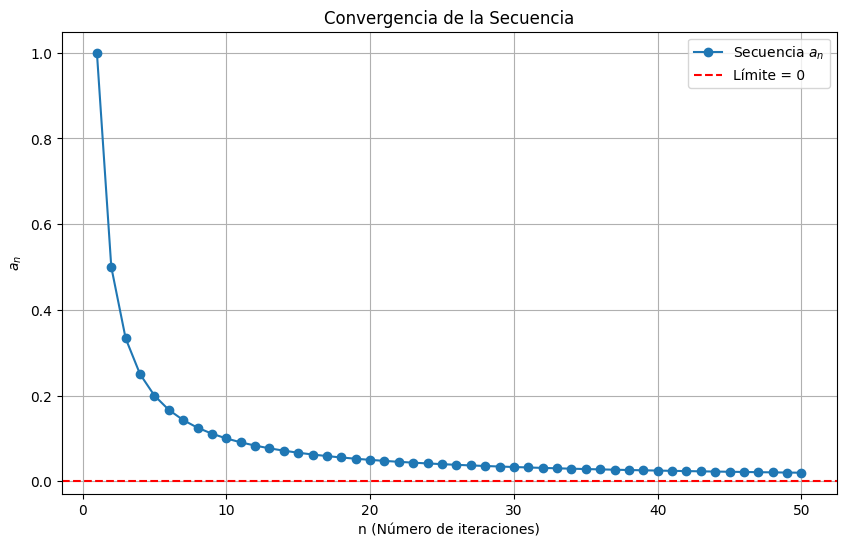

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def generar_secuencia(n_max):
    """
    Genera una secuencia que converge a un valor límite.
    En este caso, usamos a_n = 1/n, que converge a 0.
    """
    secuencia = [1 / n for n in range(1, n_max + 1)]
    return secuencia

def graficar_convergencia(secuencia, limite):
    """
    Grafica la convergencia de la secuencia hacia el límite.
    """
    n = np.arange(1, len(secuencia) + 1)
    plt.figure(figsize=(10, 6))
    plt.plot(n, secuencia, label="Secuencia $a_n$", marker="o", linestyle="-")
    plt.axhline(y=limite, color="r", linestyle="--", label=f"Límite = {limite}")
    plt.title("Convergencia de la Secuencia")
    plt.xlabel("n (Número de iteraciones)")
    plt.ylabel("$a_n$")
    plt.legend()
    plt.grid()
    plt.show()

# Parámetros
n_max = 50  # Número máximo de iteraciones
limite = 0  # Límite al que converge la secuencia

# Generar y graficar la secuencia
secuencia = generar_secuencia(n_max)
graficar_convergencia(secuencia, limite)